# Implementation and tests of data generating functions. 

In [12]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

## Frequency detection

RMS of positive eg:  1.000870230546968
RMS of negative eg:  0.998996411662491
Mean of positive eg: 0.0005602635244820571
Mean of negative eg: 0.0002131311038859169


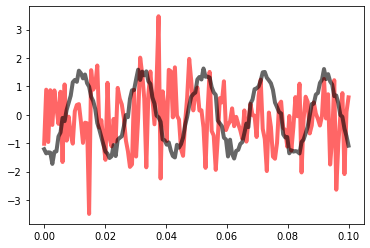

In [2]:
from data_fns import frequency_detection

# generate input
X, y = frequency_detection(n_samples=5000, fs=1500, k=5, signal_duration=0.1, a=0.99, random_state=10)
N = int(1500 * 0.1)
t = np.linspace(0, 0.1, N)

# plot
fig = plt.figure()
plt.plot(t, X[y==-1][0], c='r', alpha=0.6, lw=4)
plt.plot(t, X[y==1][1], c='k', alpha=0.6, lw=4)

# check that the RMS of the input is the same
X_pos = X[y==1]
X_neg = X[y==-1]

print('RMS of positive eg: ', np.mean(la.norm(X_pos, axis=1) ** 2 / X_pos.shape[1]))
print('RMS of negative eg: ', np.mean(la.norm(X_neg, axis=1) ** 2 / X_neg.shape[1]))

print('Mean of positive eg:', np.mean(X_pos))
print('Mean of negative eg:', np.mean(X_neg))

## Frequency XOR

RMS of f1:  1.0014706696031441
RMS of f2:  0.9998107879744083
RMS of mixed: 1.0008294270619342
RMS of noise: 1.0004337243343915


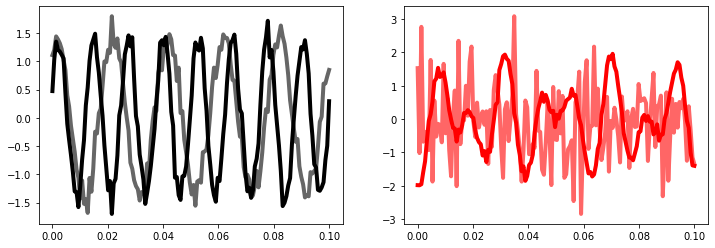

In [3]:
from data_fns import frequency_XOR

# generate input
X, y = frequency_XOR(n_samples=5000, fs=1500, k1=5, k2=8, signal_duration=0.1, a=0.99, random_state=10, shuffle=False)
N = int(1500 * 0.1)
t = np.linspace(0, 0.1, N)

# check that the RMS of all the input classes are the same
n_quarter = int(5000 / 4)
X_f1 = X[y==1][:n_quarter]
X_f2 = X[y==1][n_quarter:]
X_mixed = X[y==-1][:n_quarter]
X_noise = X[y==-1][n_quarter:]

print('RMS of f1: ', np.mean(la.norm(X_f1, axis=1) ** 2 / X_pos.shape[1]))
print('RMS of f2: ', np.mean(la.norm(X_f2, axis=1) ** 2 / X_neg.shape[1]))
print('RMS of mixed:', np.mean(la.norm(X_mixed, axis=1) ** 2 / X_mixed.shape[1]))
print('RMS of noise:', np.mean(la.norm(X_noise, axis=1) ** 2 / X_noise.shape[1]))

# print('Mean of positive eg:', np.mean(X_pos))
# print('Mean of negative eg:', np.mean(X_neg))

# plot
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121)
plt.plot(t, X[y==1][:n_quarter][0], c='k', alpha=0.6, lw=4)
plt.plot(t, X[y==1][n_quarter:][0], c='k', lw=4)

ax = fig.add_subplot(122)
plt.plot(t, X[y==-1][:n_quarter][0], c='r', alpha=1, lw=4)
plt.plot(t, X[y==-1][n_quarter:][0], c='r', alpha=0.6, lw=4)

## MNIST 

(60000, 784) (60000,) (10000, 784) (10000,)


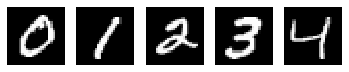

In [4]:
from data_fns import load_mnist

train, train_labels, test, test_labels = load_mnist('data/mnist/')
print(train.shape, train_labels.shape, test.shape, test_labels.shape)

fig = plt.figure()
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1)
    x = train[train_labels==i][0]
    plt.imshow(x.reshape(28, 28), cmap='gray')
    plt.axis('off')

## CIFAR-10 data

(50000, 1024) (50000,) (10000, 1024) (10000,)


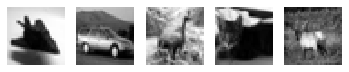

In [5]:
from data_fns import load_cifar_10
train, train_labels, test, test_labels = load_cifar_10('data/cifar_10/', grayscale=True)
print(train.shape, train_labels.shape, test.shape, test_labels.shape)

fig = plt.figure()
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1)
    x = train[train_labels==i][0]
    plt.imshow(x.reshape(32, 32), cmap='gray')
    plt.axis('off')

## KMNIST (Kuzushiji-MNIST)

(60000, 784) (60000,) (10000, 784) (10000,)


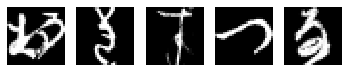

In [6]:
from data_fns import load_kmnist
train, train_labels, test, test_labels = load_kmnist('data/kmnist/')
print(train.shape, train_labels.shape, test.shape, test_labels.shape)

fig = plt.figure()
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1)
    x = train[train_labels==i][0]
    plt.imshow(x.reshape(28, 28), cmap='gray')
    plt.axis('off')

## Omniglot dataset

(19280, 105, 105) (19280,)


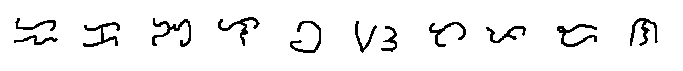

In [27]:
from data_fns import download_omniglot, load_omniglot
# if data hasn't been downloaded
# download_omniglot('data/')
data, labels = load_omniglot('./data/omniglot-py/')
print(data.shape, labels.shape)

fig = plt.figure(figsize=(12, 2))
for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    x = data[labels==i][0]
    plt.imshow(x, cmap='gray')
    plt.axis('off')

## Fashion-MNIST dataset

(60000, 784) (60000,) (10000, 784) (10000,)


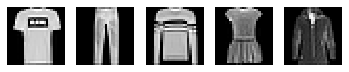

In [13]:
from data_fns import load_fashion_mnist
train, train_labels, test, test_labels = load_fashion_mnist()
print(train.shape, train_labels.shape, test.shape, test_labels.shape)

fig = plt.figure()
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1)
    x = train[train_labels==i][0]
    plt.imshow(x.reshape(28, 28), cmap='gray')
    plt.axis('off')